# Coffee Quality Decision Tree Demo

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

import sklearn.tree as tree
import graphviz

In [2]:
# Let's start by loading in our train and test datasets
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data_balanced.csv')

df_test.head(3)

,Species,Country.of.Origin,Number.of.Bags,In.Country.Partner,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,...,Sweetness,Cupper.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_low_meters,altitude_high_meters,quality
0,Arabica,Colombia,275,Almacafé,Caturra,Washed / Wet,7.67,7.75,7.42,7.83,...,10.0,7.42,0.11,0,0.0,Green,1,1650.0,1650.0,excellent
1,Arabica,Honduras,275,Instituto Hondureño del Café,Caturra,Washed / Wet,7.50,7.58,7.33,7.50,...,10.0,7.58,0.10,0,1.0,Green,8,1396.0,1396.0,excellent
2,Arabica,Mexico,10,AMECAFE,Bourbon,Washed / Wet,7.50,7.58,7.42,7.67,...,10.0,7.33,0.13,0,0.0,Green,3,1170.0,1170.0,excellent


In [3]:
# So now we've loaded in our datasets, first order of business is to drop the
# quality measure columns
df_train = df_train.drop(['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points', 'Country.of.Origin', 'In.Country.Partner', 'Variety'], axis=1)
df_test = df_test.drop(['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Country.of.Origin', 'In.Country.Partner', 'Variety'],axis=1)

# And we'll also shuffle for good measure
df_train = df_train.sample(frac=1.0, random_state=0)
df_test = df_test.sample(frac=1.0, random_state=0)

df_train.head(3)

,Species,Number.of.Bags,Processing.Method,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_low_meters,altitude_high_meters,quality
1034,Arabica,50,Washed / Wet,0.10,0,0.0,Blue-Green,0,500.0,700.0,very good
124,Arabica,10,Natural / Dry,0.15,1,0.0,None,8,441.0,441.0,excellent
184,Arabica,44,Washed / Wet,0.11,0,0.0,Green,2,950.0,950.0,excellent


In [4]:
# Now we can define our target and features
X_train = df_train.drop(['quality'], axis=1)
X_test = df_test.drop(['quality'], axis=1)

y_train = df_train['quality']
y_test = df_test['quality']

In [5]:
# We'll get dummies for the categorical data and standardize the numerical columns
X_train_num = X_train.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(exclude='number')

X_train_cat = pd.get_dummies(X_train_cat)
X_train_num = (X_train_num - X_train_num.mean()) / X_train_num.std()

X_train = pd.concat([X_train_num, X_train_cat], axis=1)

X_test_num = X_test.select_dtypes(include='number')
X_test_cat = X_test.select_dtypes(exclude='number')

X_test_cat = pd.get_dummies(X_test_cat)
X_test_num = (X_test_num - X_test_num.mean()) / X_test_num.std()

X_test = pd.concat([X_test_num, X_test_cat], axis=1)

In [6]:
print(X_train.shape)
X_train.head(3)

(1244, 18)


,Number.of.Bags,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,Species_Arabica,Species_Robusta,Processing.Method_Natural / Dry,Processing.Method_Other,Processing.Method_Pulped natural / honey,Processing.Method_Semi-washed / Semi-pulped,Processing.Method_Washed / Wet,Color_Blue-Green,Color_Bluish-Green,Color_Green,Color_None
1034,-0.807907,-0.039962,-0.269278,-0.175172,-0.744302,-0.129194,-0.114575,1,0,0,0,0,0,1,1,0,0,0
124,-1.126193,1.196664,0.102511,-0.175172,0.372432,-0.134124,-0.136221,1,0,1,0,0,0,0,0,0,0,1
184,-0.855650,0.207363,-0.269278,-0.175172,-0.465119,-0.091589,-0.093681,1,0,0,0,0,0,1,0,0,1,0


In [7]:
y_test.value_counts()

very good    161
excellent    161
Name: quality, dtype: int64

In [8]:
# Now let's set up our DecisionTreeClassifier
grid = {'max_depth': np.arange(1, 30)}

Tree = DecisionTreeClassifier()
TreeCV = GridSearchCV(Tree, param_grid=grid, return_train_score=True)

TreeCV.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             return_train_score=True)

In [9]:
print('best depth', TreeCV.best_params_['max_depth'])
print('validation accuracy', TreeCV.best_score_.round(3))

best depth 27
validation accuracy 0.937


In [10]:
best_tree = DecisionTreeClassifier(max_depth=TreeCV.best_params_['max_depth'])
best_tree.fit(X_train, y_train)
print(best_tree.score(X_test, y_test).round(3))

0.693


In [11]:
dot_data = tree.export_graphviz(best_tree,
                               out_file=None,
                               feature_names=X_test.columns,
                               class_names = ['excellent','very good'],
                               proportion=True,
                               impurity=False,
                               filled=True,
                               rounded=True)

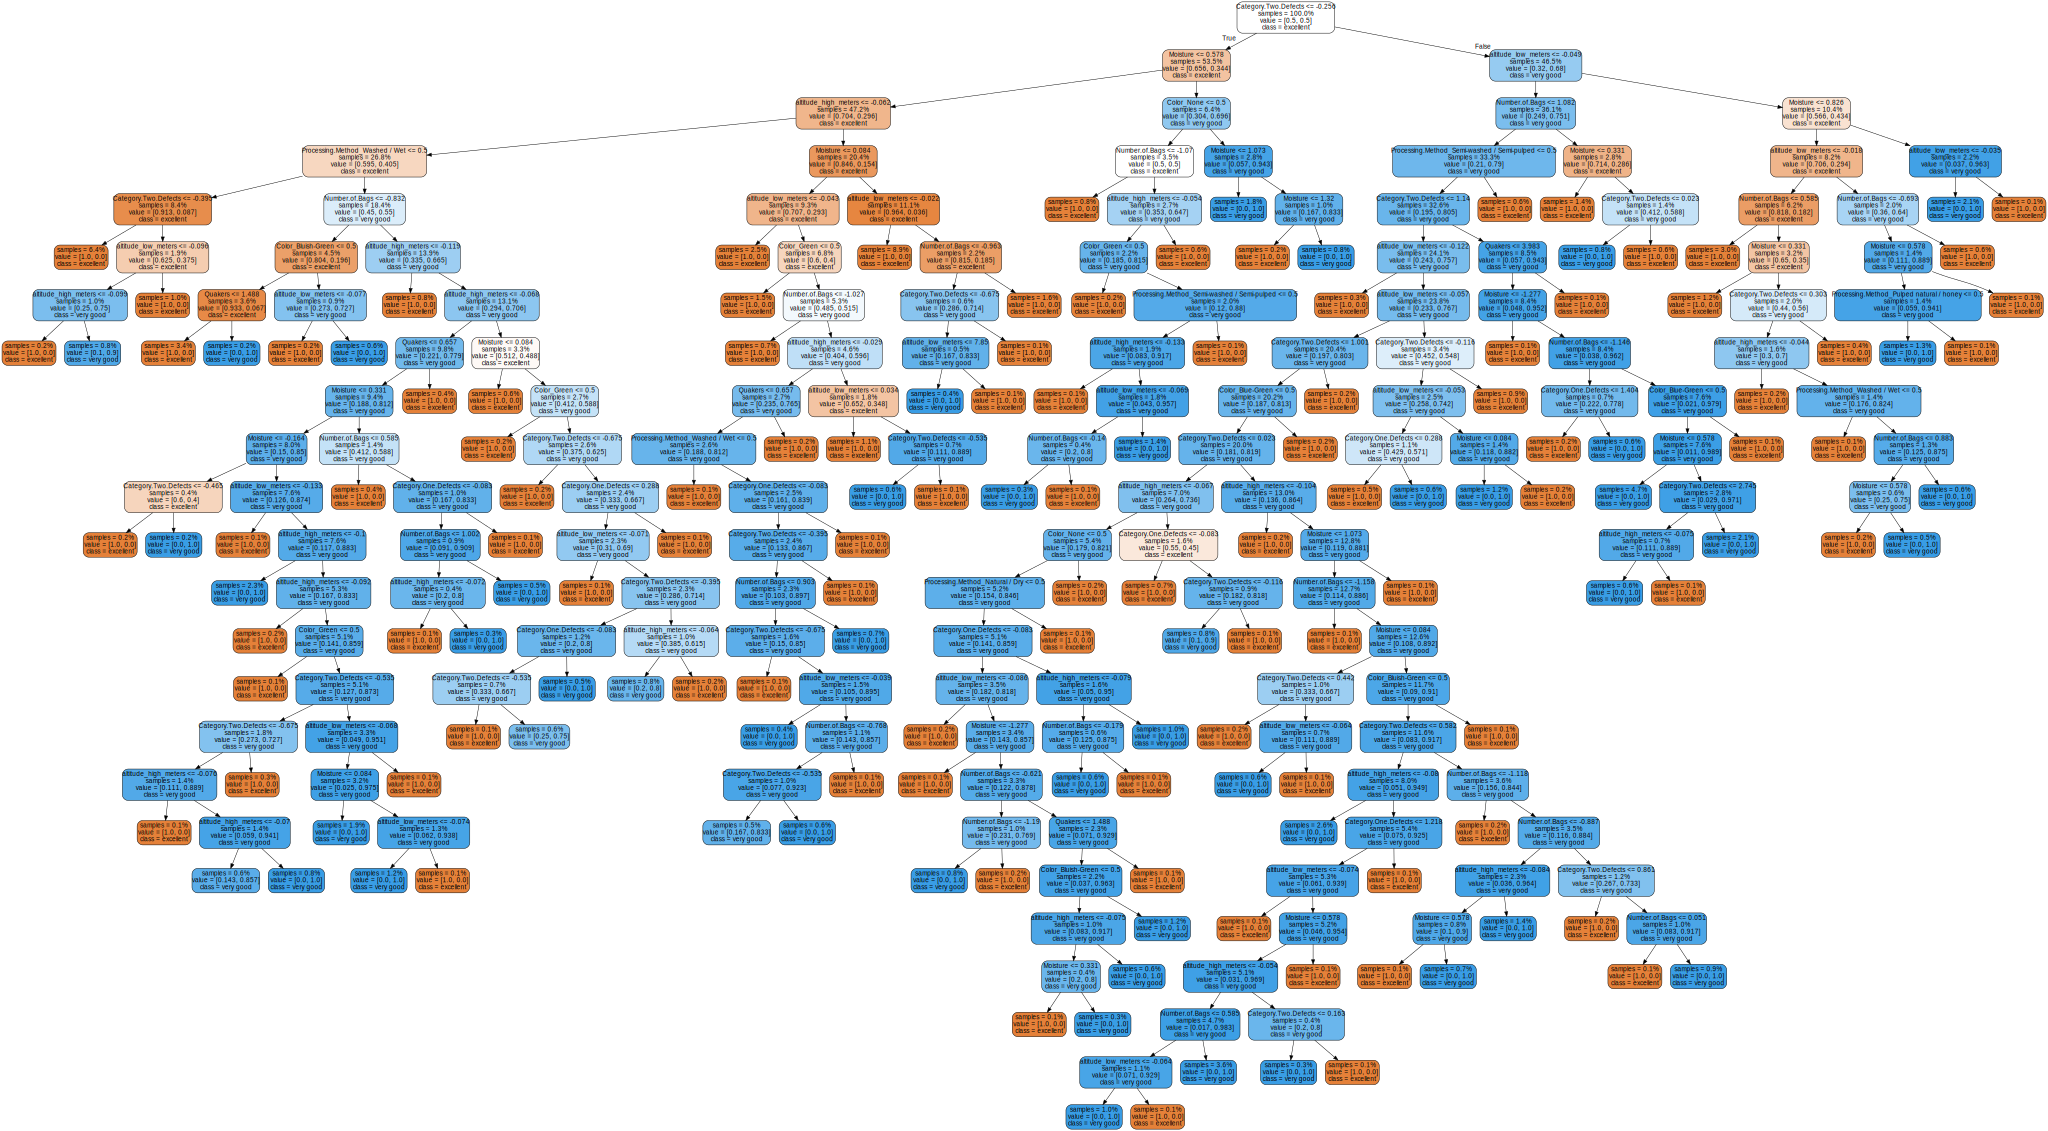

In [12]:
graph = graphviz.Source(dot_data)
graph

In [13]:
# output a PDF file of tree
graph.render('Coffee_Tree')

'Coffee_Tree.pdf'